In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k, max_iter = 100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        
    def random_centroids(self, vals):
        v = vals.shape[0]//self.k
        centroids = []
        for i in range(self.k):
            centroids.append(np.mean(vals[i*v:v*(i+1)], axis=0))
            
        return np.array(centroids)
    
    def create_clusters(self, vals, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, point in enumerate(vals):
            closest_centroid = np.argmin(np.sqrt(np.sum((vals[idx]-centroids)**2, axis=1)))
            clusters[closest_centroid].append(idx)
        return clusters
    
    def calculate_centroids_from_clusters(self, clusters, vals):
        centroids = []
        for idx, cluster in enumerate(clusters):
            centroid = np.mean(vals[cluster], axis=0)
            centroids.append(centroid)
        return np.array(centroids)
    
    def convert_clusters_to_labels(self, clusters, vals):
        labels = np.zeros(len(vals))
        for cluster_idx, cluster in enumerate(clusters):
            for idx in cluster:
                labels[idx] = cluster_idx
        return labels
    
    def fit(self, vals):
        centroids = self.random_centroids(vals)
        for i in range(self.max_iter):
            print("centroids", centroids)
            print(f"iter no {i}")
            clusters = self.create_clusters(vals, centroids)
            #print(clusters)
            prev = centroids
            centroids = self.calculate_centroids_from_clusters(clusters, vals)
            if np.allclose(centroids, prev):
                break
        self._labels = self.convert_clusters_to_labels(clusters, vals)

In [143]:
df = pd.read_csv("gene_expression.csv", header = None)

with open("cell_types.txt") as f:
    cell_types = f.read().splitlines()

In [144]:
kmeans = KMeans(4)
kmeans.fit(df.to_numpy())

centroids [[0.06869221 0.13562307 0.12769705 ... 0.3659181  0.04271246 1.36547776]
 [0.05900484 0.16424483 0.15587847 ... 0.25275209 0.03390577 0.91325407]
 [0.06076618 0.11580801 0.13386173 ... 0.33641568 0.02950242 1.52752092]
 [0.05019815 0.11712902 0.13430207 ... 0.22985469 0.02994276 1.21268164]]
iter no 0
centroids [[0.06086957 0.12560386 0.13478261 ... 0.29758454 0.03961353 1.26038647]
 [0.06622973 0.17626768 0.15246637 ... 0.24974129 0.03518455 0.96378061]
 [0.04705882 0.07165775 0.1026738  ... 0.37647059 0.03048128 1.71925134]
 [0.06055209 0.13579697 0.15138023 ... 0.28806768 0.03027605 1.23909172]]
iter no 1
centroids [[0.06128364 0.13995859 0.1494824  ... 0.29979296 0.036853   1.26459627]
 [0.06521739 0.17717391 0.14927536 ... 0.23876812 0.03442029 0.93913043]
 [0.04413348 0.07696448 0.10118407 ... 0.32131324 0.032831   1.55866523]
 [0.06432749 0.11695906 0.14230019 ... 0.34649123 0.03118908 1.39327485]]
iter no 2
centroids [[0.06992139 0.17087298 0.17252793 ... 0.34795201 0

In [145]:
import plotly.express as px
from sklearn.decomposition import PCA
# Use PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_features = pca.fit_transform(df.values)
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

# Add cluster labels to PCA dataframe
pca_df['Cluster'] = kmeans._labels
pca_df['Cell Type'] = cell_types
# Create 3D scatter plot
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.5, hover_data=['Cluster', 'Cell Type'])

# Set title and axis labels
fig.update_layout(title='K-means clustering in 3D', scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))

# Show the plot
fig.show()

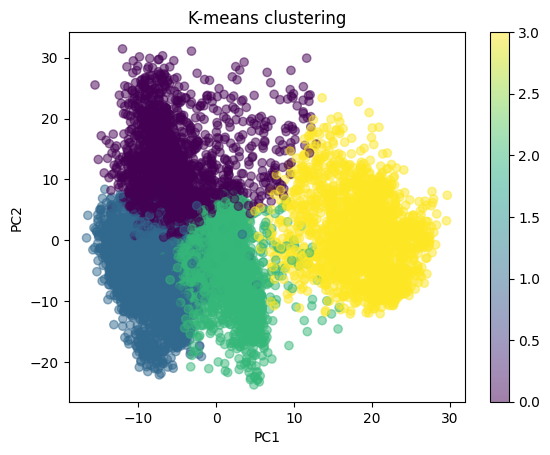

In [146]:
# Use PCA to reduce to 2 dimensions
cluster_labels = kmeans._labels
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.values)
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2'])

# plot data
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering")
plt.colorbar()
plt.savefig("clustering.png")
plt.show()